<a href="https://colab.research.google.com/github/Aishwarya-byte21/Diamond-Price-Prediction/blob/main/Diamonds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
 #Load Dataset & Data Preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/diamonds.csv")
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [17]:
df.shape


(53940, 10)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [19]:
df.describe()


,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [20]:
df.isnull().sum()


,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


In [21]:
(df[['x','y','z']] == 0).sum()


,0
x,8
y,7
z,20


In [22]:
df[(df['x']==0) | (df['y']==0) | (df['z']==0)].shape


(20, 10)

In [23]:
df[['x','y','z']] = df[['x','y','z']].replace(0, np.nan)


In [24]:
df.isnull().sum()


,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,8
y,7
z,20


In [25]:
df['x'].fillna(df['x'].median(), inplace=True)
df['y'].fillna(df['y'].median(), inplace=True)
df['z'].fillna(df['z'].median(), inplace=True)


/tmp/ipython-input-2468549500.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['x'].fillna(df['x'].median(), inplace=True)
/tmp/ipython-input-2468549500.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [26]:
df.isnull().sum()


,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


In [27]:
df.columns


Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [28]:
df.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')


In [29]:
df.shape


(53940, 10)

In [30]:
df.describe()


,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.732003,5.735267,3.540043
std,0.474011,1.432621,2.234491,3989.439738,1.119587,1.140265,0.702400
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


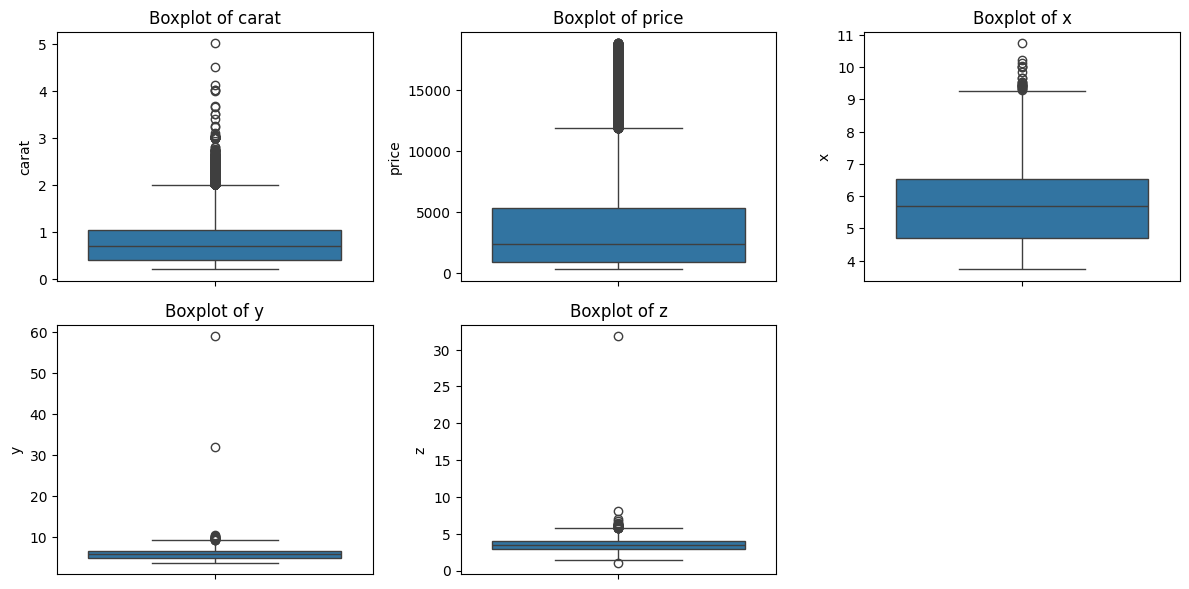

In [33]:
plt.figure(figsize=(12,6))
for i, col in enumerate(num_cols):
    plt.subplot(2,3,i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


In [34]:
from scipy.stats import zscore

z_scores = np.abs(zscore(df[num_cols]))
z_scores


array([[1.19816781, 0.90409516, 1.59167546, 1.53936477, 1.58037123],
       [1.24036129, 0.90409516, 1.64526714, 1.66214442, 1.75121561],
       [1.19816781, 0.9038445 , 1.50235598, 1.46043499, 1.75121561],
       ...,
       [0.20662095, 0.29473076, 0.06431234, 0.04846899, 0.02841336],
       [0.13092691, 0.29473076, 0.37335311, 0.33740992, 0.28467993],
       [0.10113725, 0.29473076, 0.08753077, 0.11816054, 0.14230961]])

In [35]:
df_clean = df[(z_scores < 3).all(axis=1)]

print("Before outlier removal:", df.shape)
print("After outlier removal :", df_clean.shape)


Before outlier removal: (53940, 10)
After outlier removal : (52521, 10)


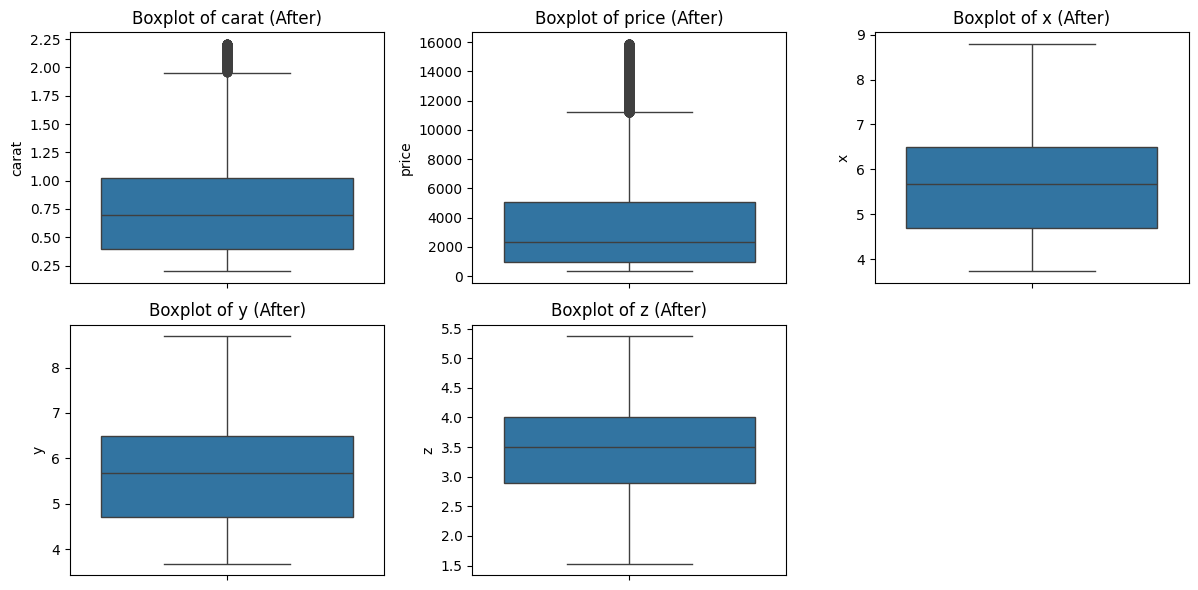

In [36]:
plt.figure(figsize=(12,6))
for i, col in enumerate(num_cols):
    plt.subplot(2,3,i+1)
    sns.boxplot(y=df_clean[col])
    plt.title(f'Boxplot of {col} (After)')

plt.tight_layout()
plt.show()


In [37]:
skewness = df_clean[['price','carat','x','y','z']].skew()
print(skewness)


price    1.458666
carat    0.883922
x        0.308036
y        0.302906
z        0.305057
dtype: float64


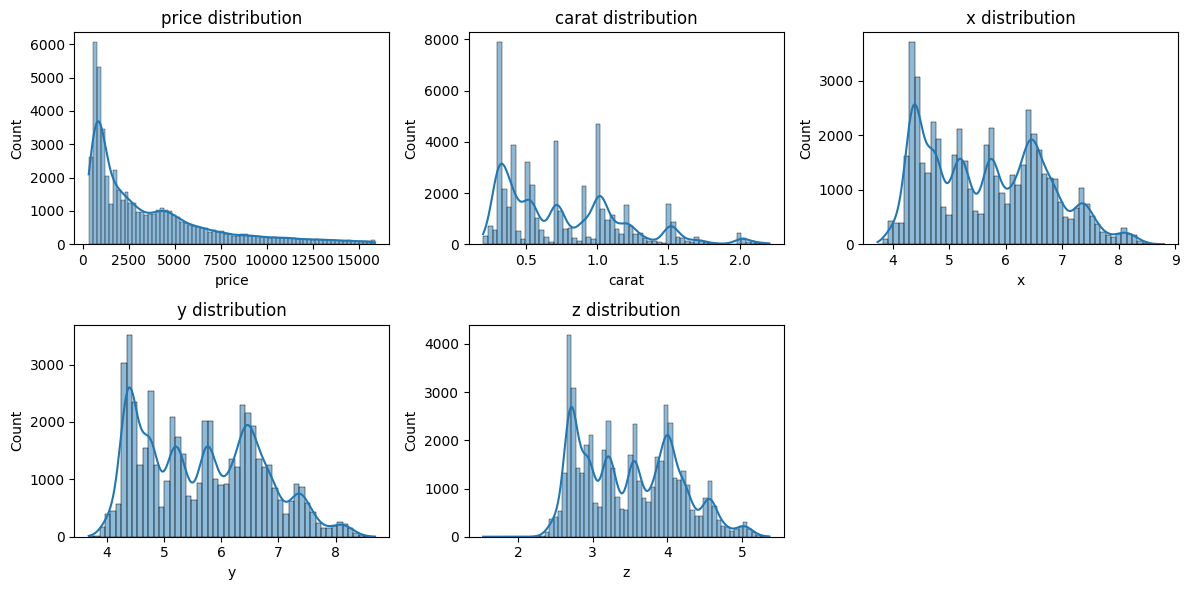

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
for i, col in enumerate(['price','carat','x','y','z']):
    plt.subplot(2,3,i+1)
    sns.histplot(df_clean[col], kde=True)
    plt.title(f'{col} distribution')

plt.tight_layout()
plt.show()


In [39]:
df_clean['price_log'] = np.log1p(df_clean['price'])
df_clean['carat_log'] = np.log1p(df_clean['carat'])


/tmp/ipython-input-1657408234.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['price_log'] = np.log1p(df_clean['price'])
/tmp/ipython-input-1657408234.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['carat_log'] = np.log1p(df_clean['carat'])


In [40]:
df_clean['x_sqrt'] = np.sqrt(df_clean['x'])
df_clean['y_sqrt'] = np.sqrt(df_clean['y'])
df_clean['z_sqrt'] = np.sqrt(df_clean['z'])


/tmp/ipython-input-858823908.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['x_sqrt'] = np.sqrt(df_clean['x'])
/tmp/ipython-input-858823908.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['y_sqrt'] = np.sqrt(df_clean['y'])
/tmp/ipython-input-858823908.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [41]:
from scipy.stats import boxcox

df_clean['price_boxcox'], _ = boxcox(df_clean['price'])
df_clean['carat_boxcox'], _ = boxcox(df_clean['carat'])


/tmp/ipython-input-2512119643.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['price_boxcox'], _ = boxcox(df_clean['price'])
/tmp/ipython-input-2512119643.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['carat_boxcox'], _ = boxcox(df_clean['carat'])


In [42]:
df_clean[['price_log','carat_log','x_sqrt','y_sqrt','z_sqrt']].skew()


,0
price_log,0.083744
carat_log,0.475016
x_sqrt,0.178090
y_sqrt,0.174656
z_sqrt,0.175103


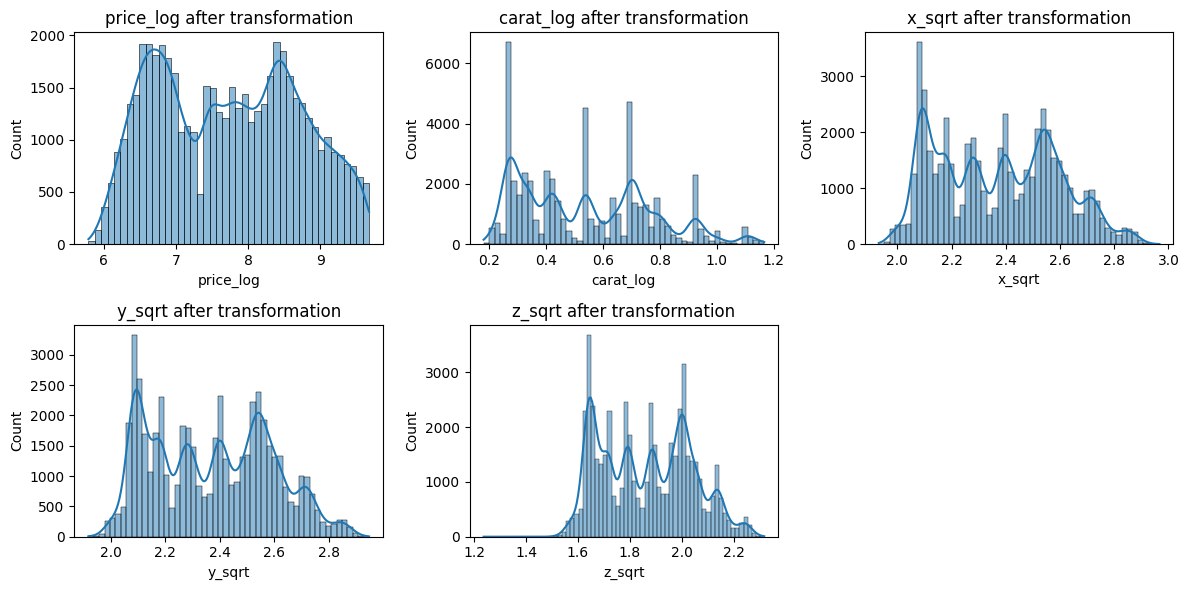

In [43]:
plt.figure(figsize=(12,6))
for i, col in enumerate(['price_log','carat_log','x_sqrt','y_sqrt','z_sqrt']):
    plt.subplot(2,3,i+1)
    sns.histplot(df_clean[col], kde=True)
    plt.title(f'{col} after transformation')

plt.tight_layout()
plt.show()


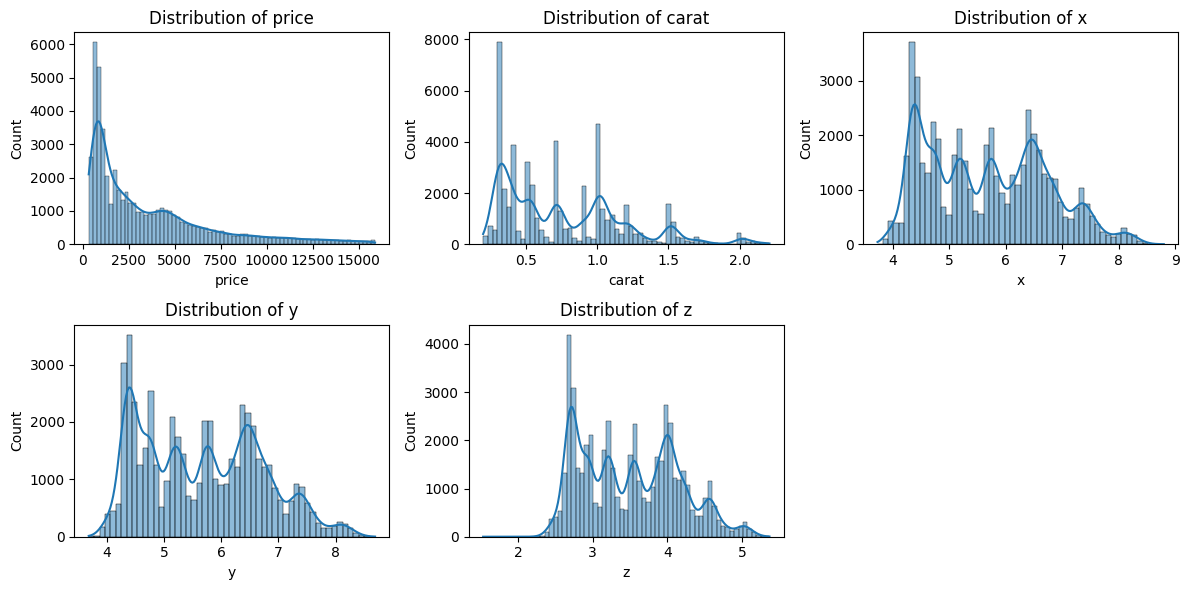

In [44]:
#EDA
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['price','carat','x','y','z']

plt.figure(figsize=(12,6))
for i, col in enumerate(num_cols):
    plt.subplot(2,3,i+1)
    sns.histplot(df_clean[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


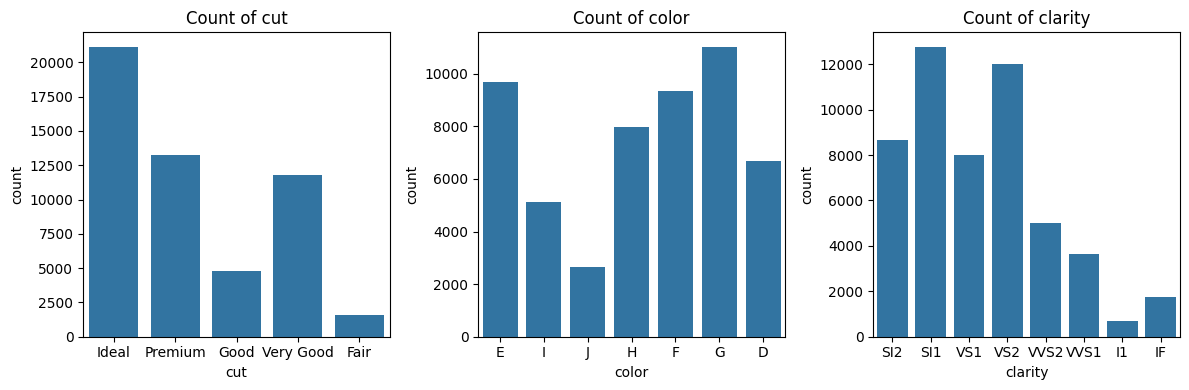

In [45]:
cat_cols = ['cut','color','clarity']

plt.figure(figsize=(12,4))
for i, col in enumerate(cat_cols):
    plt.subplot(1,3,i+1)
    sns.countplot(x=df_clean[col])
    plt.title(f'Count of {col}')

plt.tight_layout()
plt.show()


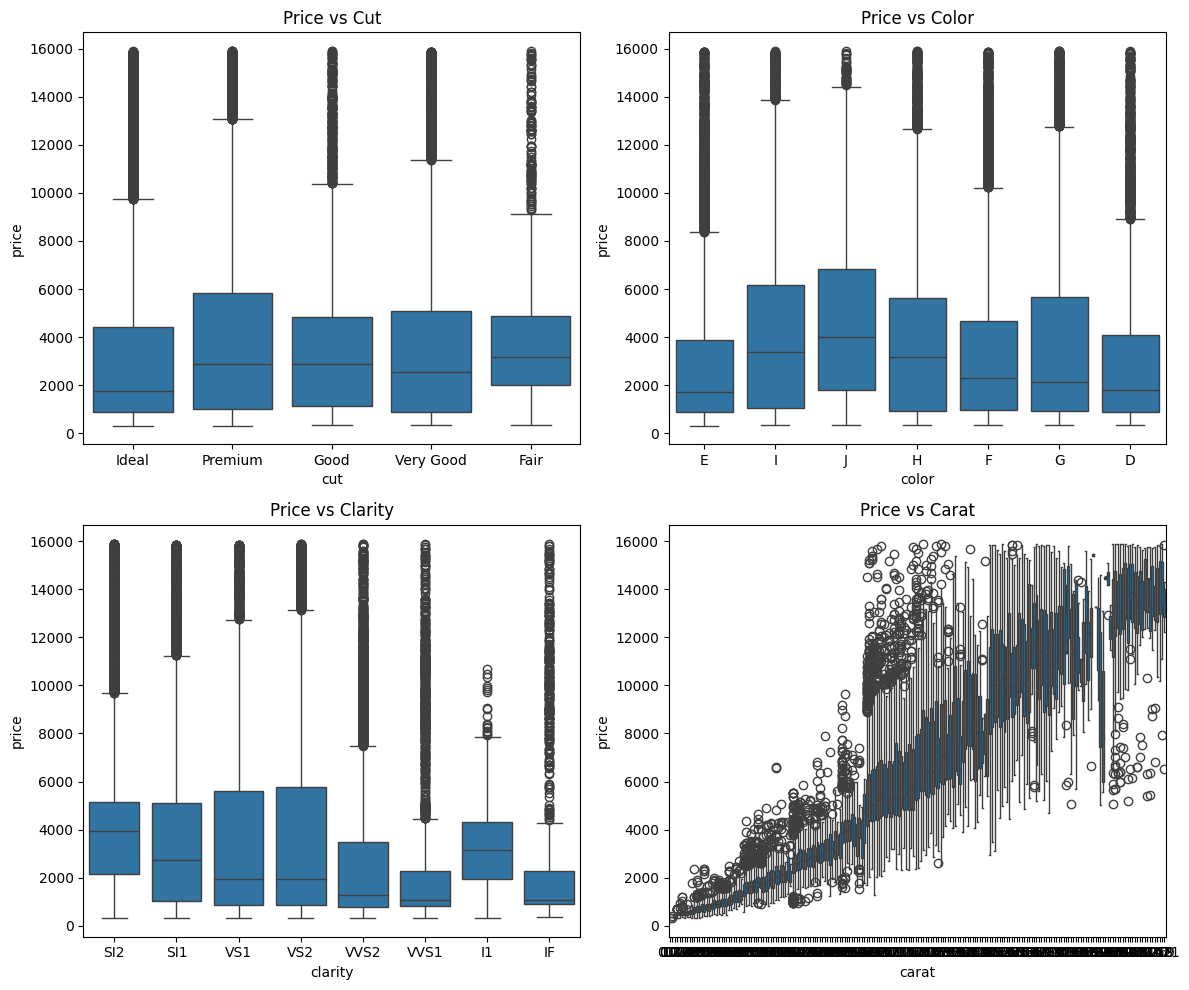

In [46]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
sns.boxplot(x='cut', y='price', data=df_clean)
plt.title('Price vs Cut')

plt.subplot(2,2,2)
sns.boxplot(x='color', y='price', data=df_clean)
plt.title('Price vs Color')

plt.subplot(2,2,3)
sns.boxplot(x='clarity', y='price', data=df_clean)
plt.title('Price vs Clarity')

plt.subplot(2,2,4)
sns.boxplot(x='carat', y='price', data=df_clean)
plt.title('Price vs Carat')

plt.tight_layout()
plt.show()


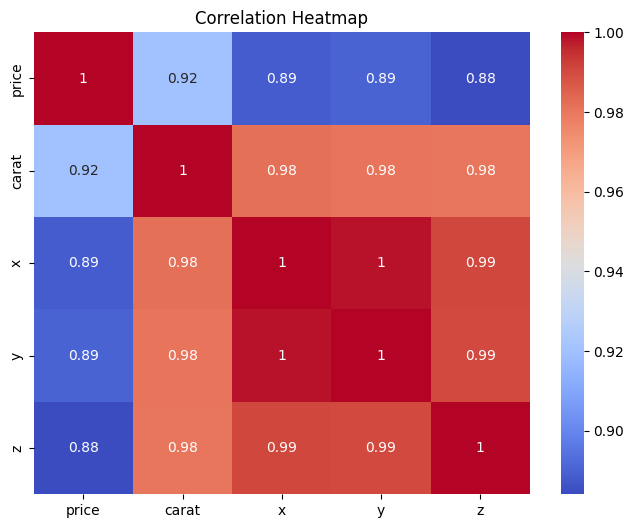

In [47]:
plt.figure(figsize=(8,6))
corr = df_clean[num_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


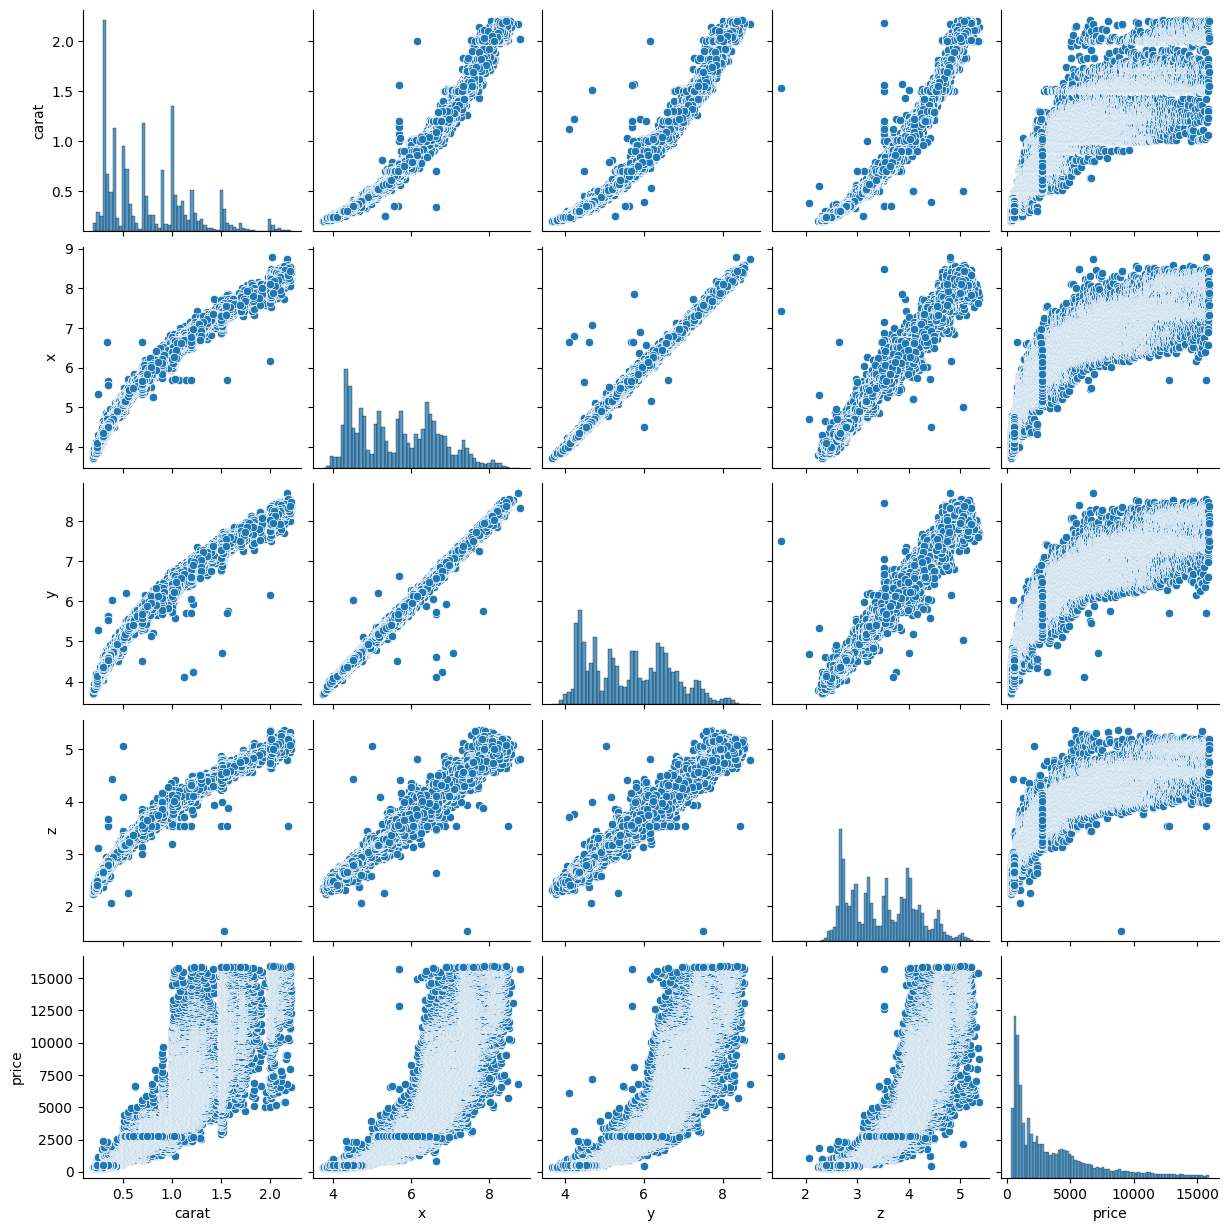

In [48]:
sns.pairplot(df_clean[['carat','x','y','z','price']])
plt.show()


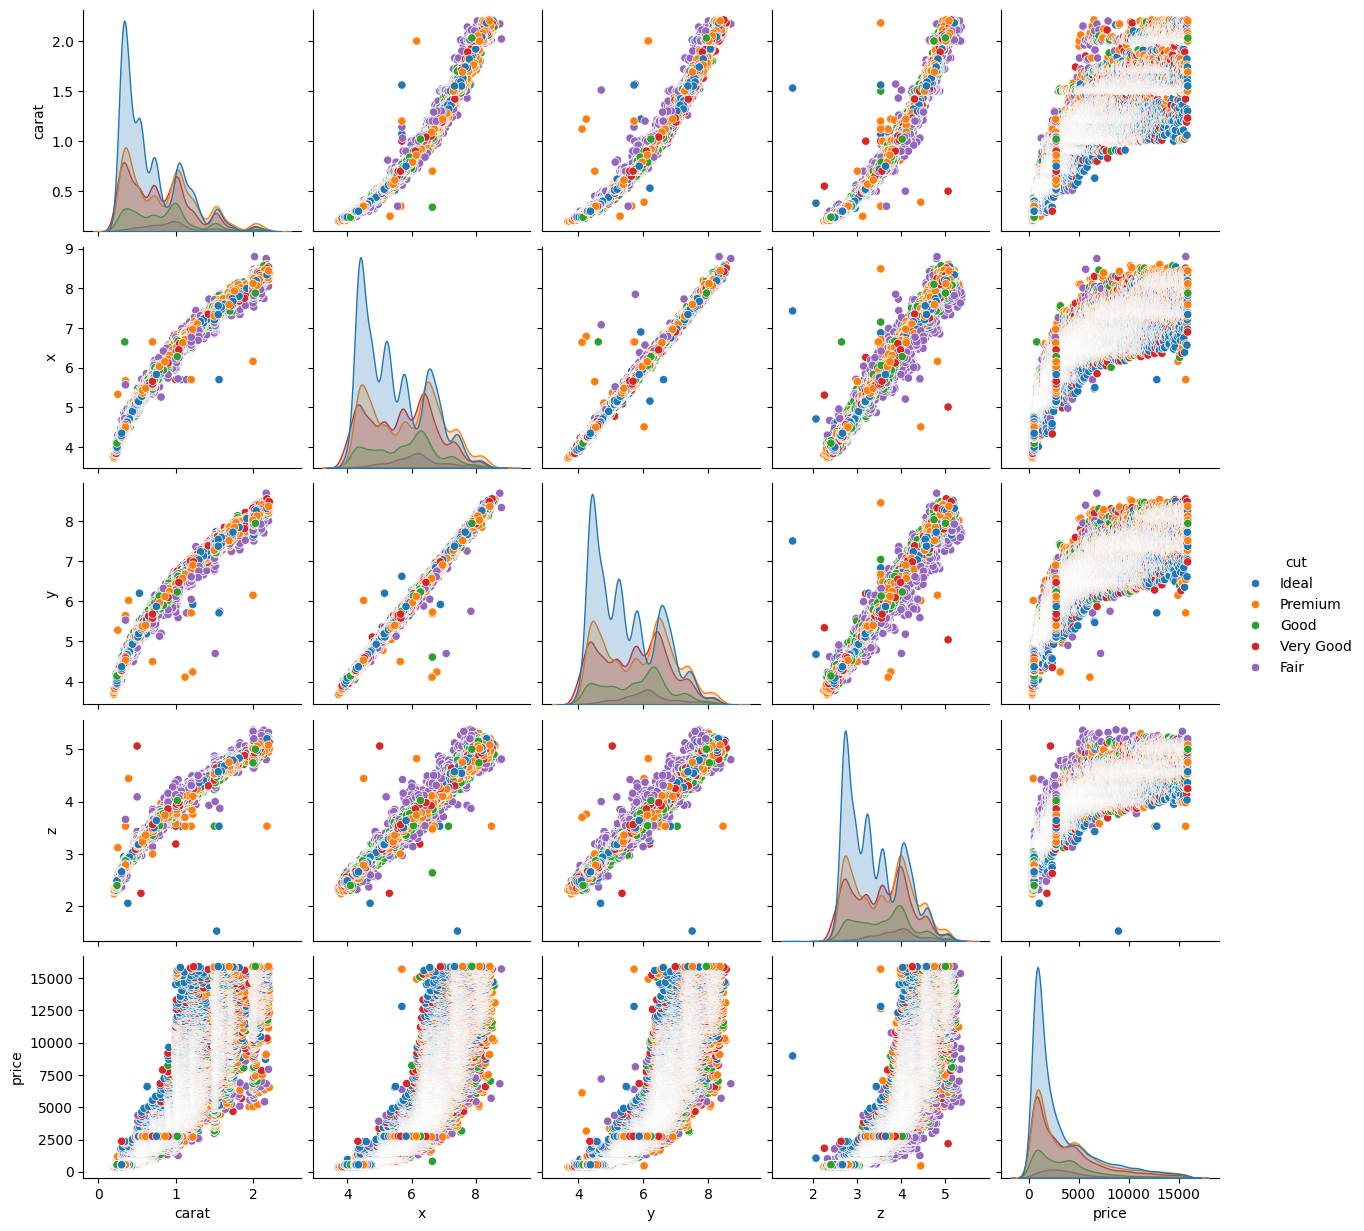

In [49]:
sns.pairplot(
    df_clean,
    vars=['carat','x','y','z','price'],
    hue='cut'
)
plt.show()


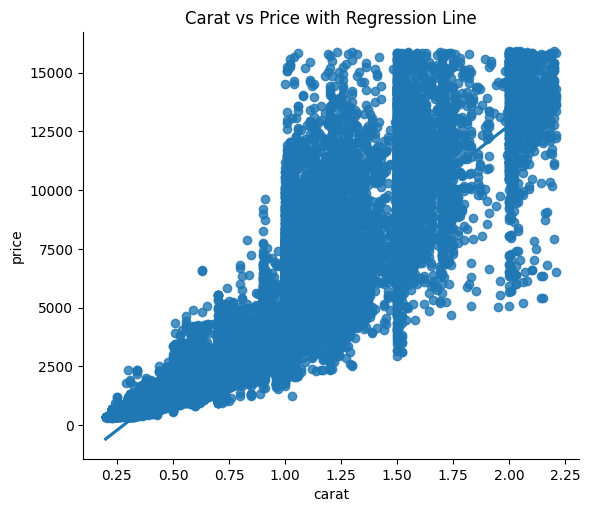

In [50]:
sns.lmplot(
    x='carat',
    y='price',
    data=df_clean,
    height=5,
    aspect=1.2
)
plt.title('Carat vs Price with Regression Line')
plt.show()


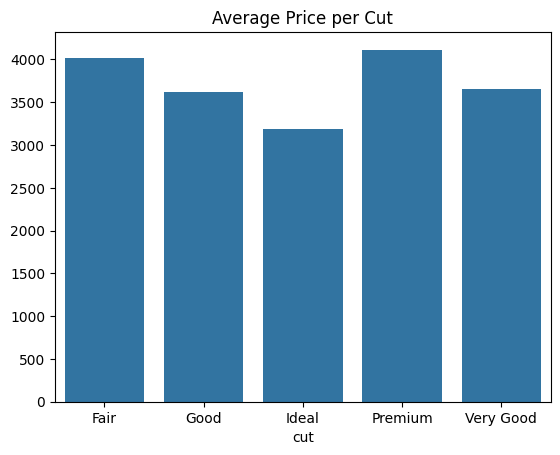

In [51]:
avg_cut = df_clean.groupby('cut')['price'].mean()

sns.barplot(x=avg_cut.index, y=avg_cut.values)
plt.title('Average Price per Cut')
plt.show()


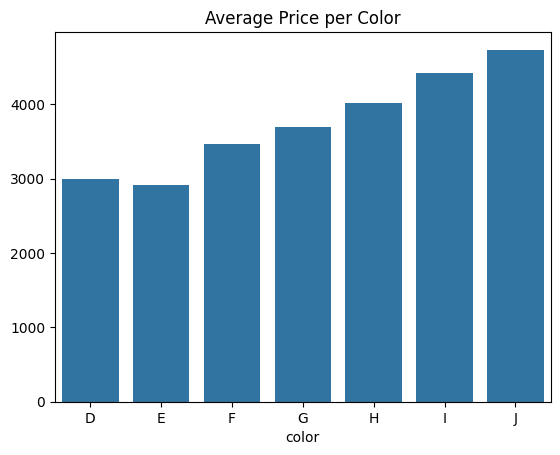

In [52]:
avg_color = df_clean.groupby('color')['price'].mean()

sns.barplot(x=avg_color.index, y=avg_color.values)
plt.title('Average Price per Color')
plt.show()


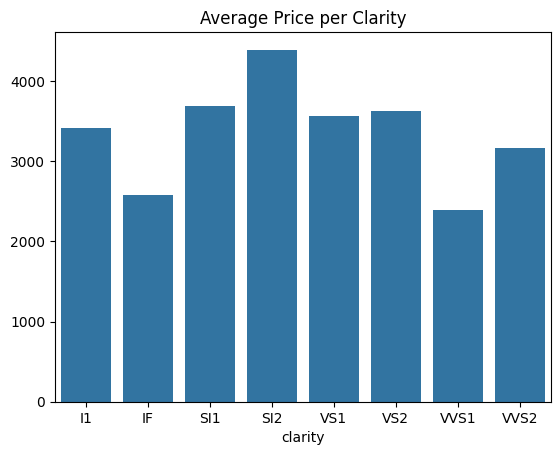

In [53]:
avg_clarity = df_clean.groupby('clarity')['price'].mean()

sns.barplot(x=avg_clarity.index, y=avg_clarity.values)
plt.title('Average Price per Clarity')
plt.show()


In [58]:
df_clean = df_clean.copy()


In [59]:
USD_TO_INR = 83

df_clean.loc[:, 'price_inr'] = df_clean['price'] * USD_TO_INR

df_clean.loc[:, 'volume'] = df_clean['x'] * df_clean['y'] * df_clean['z']

df_clean.loc[:, 'price_per_carat'] = df_clean['price'] / df_clean['carat']

df_clean.loc[:, 'dimension_ratio'] = (df_clean['x'] + df_clean['y']) / (2 * df_clean['z'])


In [60]:
num_features = [
    'carat', 'x', 'y', 'z',
    'volume', 'price_per_carat',
    'dimension_ratio', 'price'
]


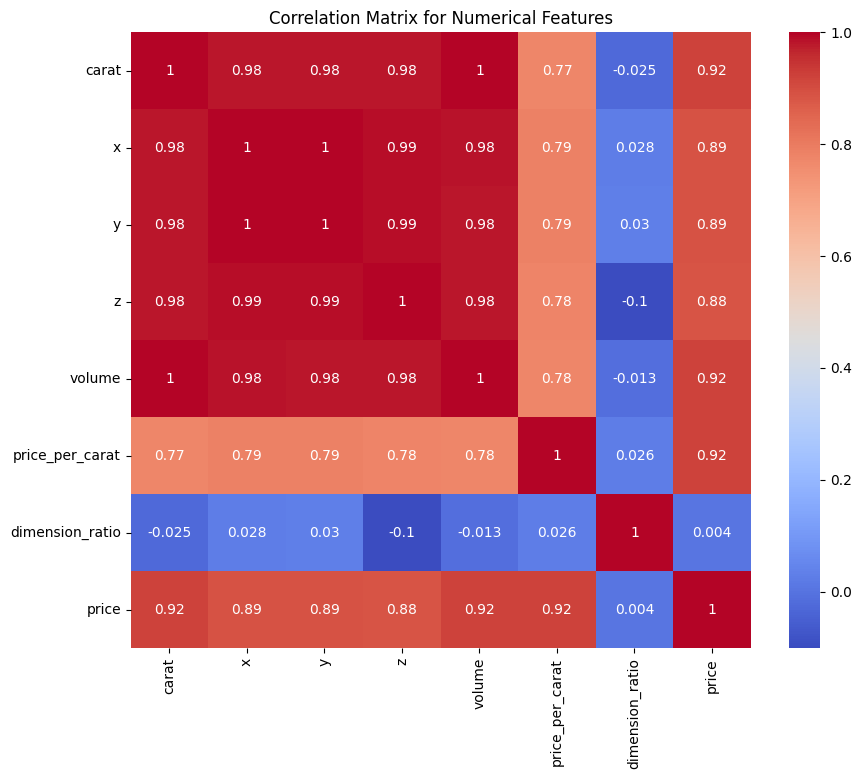

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
corr = df_clean[num_features].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Numerical Features')
plt.show()


In [62]:
df_selected = df_clean.drop(columns=['x','y','z','volume'])


In [63]:
df_clean.columns


Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'price_log', 'carat_log', 'x_sqrt', 'y_sqrt', 'z_sqrt',
       'price_boxcox', 'carat_boxcox', 'price_inr', 'volume',
       'price_per_carat', 'dimension_ratio'],
      dtype='object')

In [64]:
df_clean.select_dtypes(include='object').columns


Index(['cut', 'color', 'clarity'], dtype='object')

In [65]:
df_clean = df_clean.drop(columns=[
    'x','y','z',
    'x_sqrt','y_sqrt','z_sqrt',
    'volume', 'price_log'
])


In [66]:
from sklearn.preprocessing import OrdinalEncoder

cut_order = ['Fair','Good','Very Good','Premium','Ideal']
color_order = ['J','I','H','G','F','E','D']
clarity_order = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']

ordinal_encoder = OrdinalEncoder(
    categories=[cut_order, color_order, clarity_order]
)

df_clean[['cut','color','clarity']] = ordinal_encoder.fit_transform(
    df_clean[['cut','color','clarity']]
)


In [67]:
df_clean[['cut','color','clarity']].head()


,cut,color,clarity
0,4.0,5.0,1.0
1,3.0,5.0,2.0
2,1.0,5.0,4.0
3,3.0,1.0,3.0
4,1.0,0.0,1.0


In [68]:
df_clean.dtypes


,0
carat,float64
cut,float64
color,float64
clarity,float64
depth,float64
table,float64
price,int64
carat_log,float64
price_boxcox,float64
carat_boxcox,float64


In [69]:
y = df_clean['price']


In [70]:
X = df_clean[[
    'carat',
    'cut',
    'color',
    'clarity',
    'depth',
    'table',
    'price_per_carat',
    'dimension_ratio'
]]


In [71]:
df_clean = df_clean.drop(columns=[
    'price_inr',
    'price_boxcox',
    'carat_log',
    'carat_boxcox'
])


In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [73]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [74]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae  = mean_absolute_error(y_test, y_pred)
    mse  = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2   = r2_score(y_test, y_pred)
    return mae, mse, rmse, r2


In [75]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

lr_results = evaluate_model(lr, X_test_scaled, y_test)
lr_results


(568.4380829791555,
 498592.0177062306,
 np.float64(706.1104854810121),
 0.9556953203983257)

In [76]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

dt_results = evaluate_model(dt, X_test, y_test)
dt_results


(18.145835316515946,
 2848.52793907663,
 np.float64(53.371602365646005),
 0.9997468809904784)

In [77]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)
rf.fit(X_train, y_train)

rf_results = evaluate_model(rf, X_test, y_test)
rf_results


(9.46654640647311,
 969.9929495954307,
 np.float64(31.144709817165268),
 0.9999138068293885)

In [78]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

knn_results = evaluate_model(knn, X_test_scaled, y_test)
knn_results


(223.67967634459782,
 127882.02799809613,
 np.float64(357.60596750906734),
 0.988636456108276)

In [79]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)
xgb.fit(X_train, y_train)

xgb_results = evaluate_model(xgb, X_test, y_test)
xgb_results


(22.2513484954834,
 4525.67822265625,
 np.float64(67.27316123578741),
 0.9995978474617004)

In [81]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

ann = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

ann.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

ann.fit(
    X_train_scaled, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=0
)


In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# ANN predictions
ann_pred = ann.predict(X_test_scaled).flatten()

ann_mae  = mean_absolute_error(y_test, ann_pred)
ann_mse  = mean_squared_error(y_test, ann_pred)
ann_rmse = np.sqrt(ann_mse)
ann_r2   = r2_score(y_test, ann_pred)

ann_results = (ann_mae, ann_mse, ann_rmse, ann_r2)
ann_results


329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


(10.480684280395508,
 307.5343017578125,
 np.float64(17.536655945698783),
 0.9999727010726929)

In [83]:
import pandas as pd

results = pd.DataFrame({
    'Model': ['Linear Regression',
              'Decision Tree',
              'Random Forest',
              'KNN',
              'XGBoost',
              'ANN'],
    'MAE': [
        lr_results[0],
        dt_results[0],
        rf_results[0],
        knn_results[0],
        xgb_results[0],
        ann_results[0]
    ],
    'RMSE': [
        lr_results[2],
        dt_results[2],
        rf_results[2],
        knn_results[2],
        xgb_results[2],
        ann_results[2]
    ],
    'R2': [
        lr_results[3],
        dt_results[3],
        rf_results[3],
        knn_results[3],
        xgb_results[3],
        ann_results[3]
    ]
})

results.sort_values(by='R2', ascending=False)


,Model,MAE,RMSE,R2
5,ANN,10.480684,17.536656,0.999973
2,Random Forest,9.466546,31.144710,0.999914
1,Decision Tree,18.145835,53.371602,0.999747
4,XGBoost,22.251348,67.273161,0.999598
3,KNN,223.679676,357.605968,0.988636
0,Linear Regression,568.438083,706.110485,0.955695


In [84]:
import pickle

with open('final_model.pkl', 'wb') as f:
    pickle.dump(rf, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)


In [86]:
df_clean.columns


Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price',
       'price_per_carat', 'dimension_ratio'],
      dtype='object')

In [88]:
cluster_features = [
    'carat',
    'cut',
    'color',
    'clarity',
    'price_per_carat',
    'dimension_ratio'
]

X_cluster = df_clean[cluster_features]


In [89]:
from sklearn.preprocessing import StandardScaler

scaler_cluster = StandardScaler()
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)


In [90]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)

df_clean['cluster'] = kmeans.fit_predict(X_cluster_scaled)


In [91]:
cluster_names = {
    0: 'Premium Heavy Diamonds',
    1: 'Affordable Small Diamonds',
    2: 'Mid-range Balanced Diamonds'
}

df_clean['market_segment'] = df_clean['cluster'].map(cluster_names)


In [92]:
df_clean[['cluster', 'market_segment']].head()


,cluster,market_segment
0,0,Premium Heavy Diamonds
1,0,Premium Heavy Diamonds
2,0,Premium Heavy Diamonds
3,0,Premium Heavy Diamonds
4,2,Mid-range Balanced Diamonds


In [93]:
df_clean['market_segment'].value_counts()


,count
market_segment,
Premium Heavy Diamonds,25746
Affordable Small Diamonds,16115
Mid-range Balanced Diamonds,10660


In [94]:
# cut, color, clarity already ordinal encoded
df_clean[['cut','color','clarity']].head()


,cut,color,clarity
0,4.0,5.0,1.0
1,3.0,5.0,2.0
2,1.0,5.0,4.0
3,3.0,1.0,3.0
4,1.0,0.0,1.0


In [95]:
cluster_features = [
    'carat',
    'cut',
    'color',
    'clarity',
    'price_per_carat',
    'dimension_ratio'
]

X_cluster = df_clean[cluster_features]


In [96]:
from sklearn.preprocessing import StandardScaler

scaler_cluster = StandardScaler()
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)


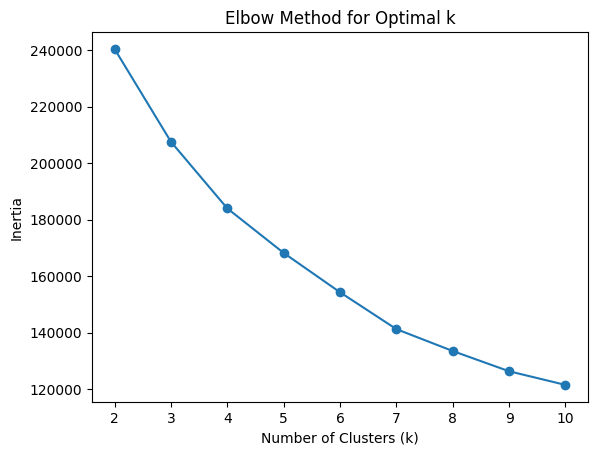

In [114]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

for k in range(2,11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_cluster_scaled)
    inertia.append(km.inertia_)

plt.plot(range(2,11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [115]:
from sklearn.metrics import silhouette_score

for k in range(2,6):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_cluster_scaled)
    score = silhouette_score(X_cluster_scaled, labels)
    print(f'k = {k}, Silhouette Score = {score:.3f}')


k = 2, Silhouette Score = 0.247
k = 3, Silhouette Score = 0.232
k = 4, Silhouette Score = 0.199
k = 5, Silhouette Score = 0.202


In [116]:
kmeans = KMeans(n_clusters=3, random_state=42)

df_clean['cluster'] = kmeans.fit_predict(X_cluster_scaled)


In [117]:
cluster_names = {
    0: 'Premium Heavy Diamonds',
    1: 'Affordable Small Diamonds',
    2: 'Mid-range Balanced Diamonds'
}

df_clean['market_segment'] = df_clean['cluster'].map(cluster_names)


In [118]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster_scaled)

df_clean['PC1'] = X_pca[:,0]
df_clean['PC2'] = X_pca[:,1]


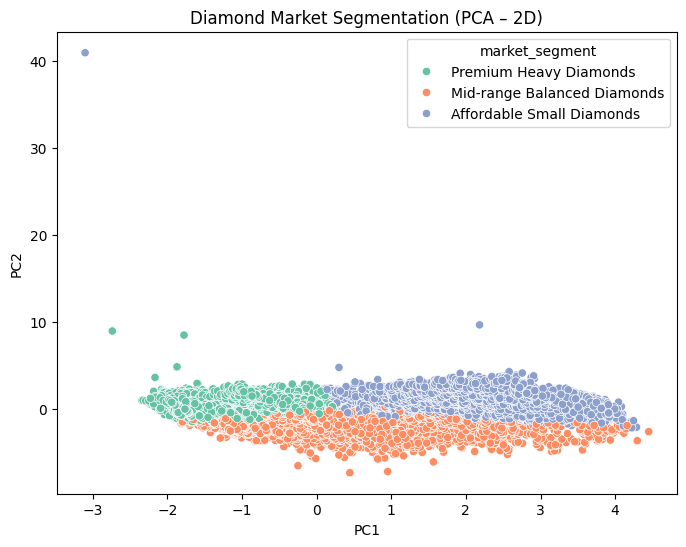

In [119]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='market_segment',
    data=df_clean,
    palette='Set2'
)
plt.title('Diamond Market Segmentation (PCA – 2D)')
plt.show()


In [120]:
import pickle

with open('kmeans_market_segmentation.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

with open('cluster_scaler.pkl', 'wb') as f:
    pickle.dump(scaler_cluster, f)

with open('pca_model.pkl', 'wb') as f:
    pickle.dump(pca, f)
